<a href="https://colab.research.google.com/github/GushintaNWorks/projects3/blob/main/Heart_Disease_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

# **Loading data**

In [ ]:
# Loading Data Untuk Latihan
import warnings; warnings.simplefilter('ignore')
import pandas as pd # Loading Module yang dibutuhkan

file_ = 'data/heart.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    data = pd.read_csv(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/arubhasy/dataset/main/heart.csv
    data = pd.read_csv(file_)

N, P = data.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
data.head()

baris =  918 , Kolom (jumlah variabel) =  12


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **Penelaahan Data (EDA)**

## **informasi Data**

Keterangan Data
1.   Age = usia
2.   Sex = Jenis Kelamin
3.   ChestPainType = tipe nyeri dada
     *   Typical Angina
     *   Atypical Angina
     *   Non-Anginal Pain
     *   Asymptomatic
4.   RestingBP = mengistirahatkan tekanan darah
     *   normal <80
     *   tinggi 120-139
     *   hipertensi tahap 1 130-139
     *   hipertensi tahap2  140-179
     *   kritis > 180
5.   Kolesterol = kolesterol
     *   baik <200
     *   waspada 200-239
     *   bahaya >240
6.   FastingBS = gula darah puasa
7.   RestingECG = hasil elektrokardiogram istirahat
8.   MaxHR = detak jantung maksimum tercapai
9.   ExerciseAngina= angin duduk
10.  Oldpeak = oldpeak = ST [Nilai numerik diukur dalam depresi]
11.  ST_Slope = kemiringan segmen ST latihan puncak [Atas: upsloping, Datar: datar, Bawah: downsloping]
12   HeartDisease = kelas keluaran [1: penyakit jantung, 0: Normal]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


Data memiliki 12 kolom dan 918 baris, selain itu terdapat missing value pada Age dan Sex

**Cek Data Duplikat**

In [ ]:
print(data.shape)
print("jumlah data yang duplikat", data.duplicated().sum())
data[data.duplicated() == True].head()

(918, 12)
jumlah data yang duplikat 0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


pada data tidak terdapat data duplikat

**mengubah data objek menjadi kategori**

In [ ]:
#mengubah data object menjadi category dengan  menyatukan varobjects terlebih dahulu lalu kita ubah
varObjects = data.select_dtypes(include = ['object'])
varObjects.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [ ]:
for col in varObjects.columns:
    data[col] = data[col].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             911 non-null    float64 
 1   Sex             908 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(5), float64(2), int64(5)
memory usage: 55.5 KB


Karena HeartDisease merupakan variabel target untuk memudahkan permodelan maka variabel HeartDisease diubah menjadi type kategori

In [ ]:
data['FastingBS'] = data['FastingBS'].astype('category')
data['HeartDisease'] = data['HeartDisease'].astype('category')

In [ ]:
data['HeartDisease'] = data['HeartDisease'].replace(to_replace= 0, value='Normal')
data['HeartDisease'] = data['HeartDisease'].replace(to_replace= 1, value='Heart disease')

# get all unique values of a variable/column
catVar = data.select_dtypes(include = ['object', 'category'])

for col in catVar.columns:
    print(col,': ', set(data[col].unique()))

Sex :  {nan, 'M', 'F'}
ChestPainType :  {'NAP', 'ATA', 'ASY', 'TA'}
FastingBS :  {0, 1}
RestingECG :  {'LVH', 'ST', 'Normal'}
ExerciseAngina :  {'Y', 'N'}
ST_Slope :  {'Down', 'Up', 'Flat'}
HeartDisease :  {'Normal', 'Heart disease'}


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             911 non-null    float64 
 1   Sex             908 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    category
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    category
dtypes: category(7), float64(2), int64(3)
memory usage: 43.2 KB


In [ ]:
#Check via Deskriptif Statistik, data deskriptif mempunya 2 fungsi yaitu bisa untuk menggambarkan data populasi
#data.describe(include='all')
data.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,911.000000,918.000000,918.000000,918.000000,918.000000
mean,54.102086,132.396514,198.799564,136.809368,0.887364
std,12.988393,18.514154,109.384145,25.460334,1.066570
min,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,177.000000,200.000000,603.000000,202.000000,6.200000


statistika deskriptif :
1. Variable yang dihitung merupakan variable numerik
2. Dari statistika deskriptif ini menggambarkan kondisi data
3. Dari sini juga terdapat informasi terkait dengan kemungkinan adanya  noise seperti outlier, yang terlihat pada nilai max.


## **Missing Value**

In [ ]:
print(data.isnull().sum())

Age                7
Sex               10
ChestPainType      0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64


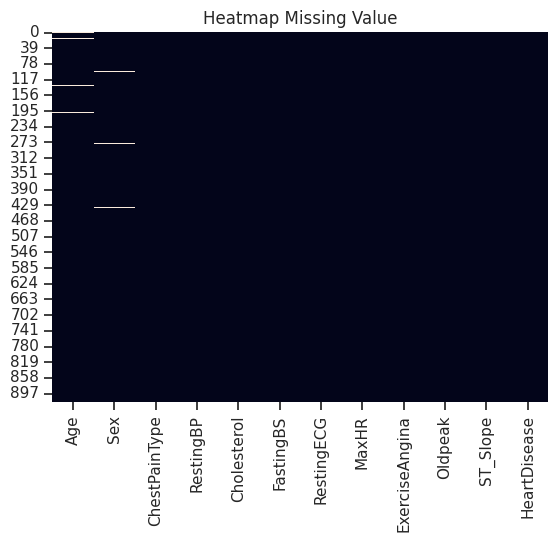

In [ ]:
sns.heatmap(data.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

**menghilangkan missing value**

In [ ]:
data = data.dropna() # jika ada MV minimal satu di salah satu kolom, maka baris di hapus
#data.dropna(how='all') # jika ada MV di semua kolom, maka baris di hapus
#data.dropna(thresh=2) # jika ada MV minimal di salah 2 kolom, maka baris di hapus
#data.dropna(subset=['Pekerjaan'])[:7] # jika ada MV minimal satu di salah kolom Dist_Hospital
print(data.shape, data.shape)
data.head()

(902, 12) (902, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,Heart disease
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,Normal
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,Heart disease
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,Normal
5,39.0,M,NAP,120,339,0,Normal,170,N,0.0,Up,Normal


In [ ]:
print(data.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


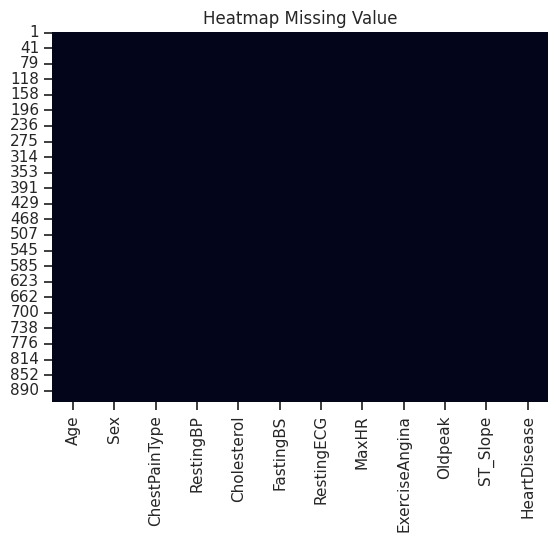

In [ ]:
sns.heatmap(data.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 902 entries, 1 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             902 non-null    float64 
 1   Sex             902 non-null    category
 2   ChestPainType   902 non-null    category
 3   RestingBP       902 non-null    int64   
 4   Cholesterol     902 non-null    int64   
 5   FastingBS       902 non-null    category
 6   RestingECG      902 non-null    category
 7   MaxHR           902 non-null    int64   
 8   ExerciseAngina  902 non-null    category
 9   Oldpeak         902 non-null    float64 
 10  ST_Slope        902 non-null    category
 11  HeartDisease    902 non-null    category
dtypes: category(7), float64(2), int64(3)
memory usage: 49.4 KB


## **Noise**

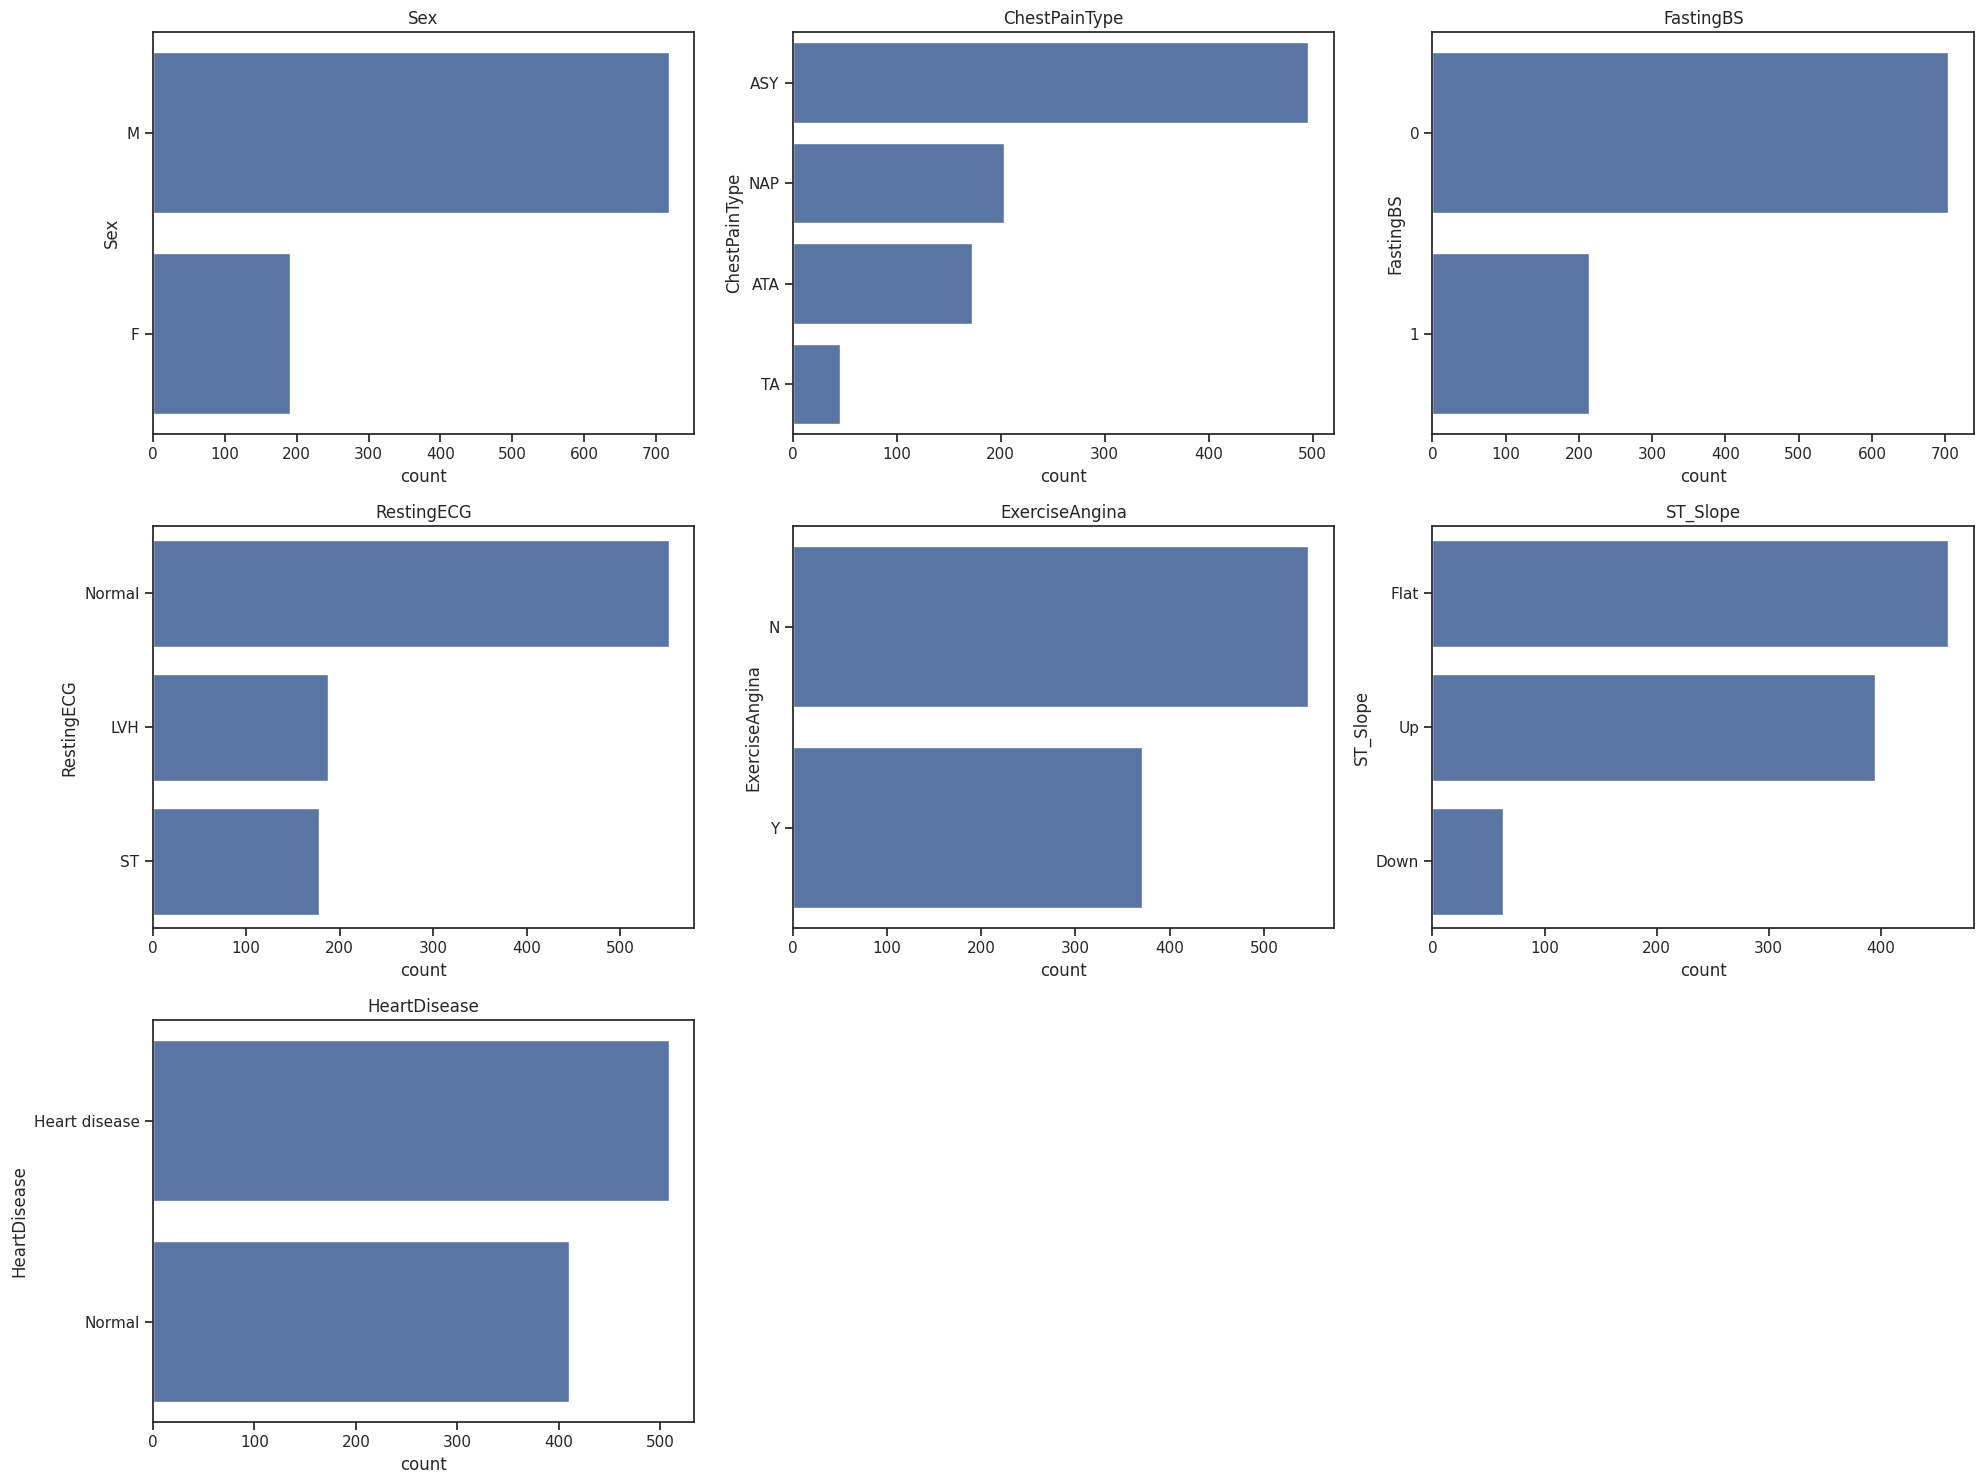

In [ ]:
# Menghitung jumlah baris dan kolom subplot
num_variables = len(catVar.columns)
num_cols = 3  # Sesuaikan sesuai kebutuhan
num_rows = int(np.ceil(num_variables / num_cols))

# Membuat grid countplot dengan Seaborn
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))

# Menggunakan Seaborn untuk membuat countplot dalam grid
for i, ax in enumerate(axes.flatten()):
    if i < num_variables:
        col = catVar.columns[i]
        if catVar[col].dtype == 'bool':
            sns.countplot(y=col, data=catVar.astype({col: 'object'}), ax=ax, order=catVar.iloc[:, i].value_counts(ascending=False).index)
        else:
            sns.countplot(y=col, data=catVar, ax=ax, order=catVar.iloc[:, i].value_counts(ascending=False).index)
        ax.set_title(col)
    else:
        fig.delaxes(ax)

# Mengatur layout
plt.tight_layout()
plt.show()

* **visualisasi kategorik** ini digunakan untuk melihat apakah ada nilai variable yang dirasa akan menjadi noise (nilainya terlalu tinggi atau terlalu rendah)
* **Kesimpulan** berdasar domain knowledge walaupun terdapat nilai yang memiliki selisih yang lumayan jauh, tetapi kategori pada ChestPainType, ST_Slope, Sex, RestingECG, FastingBS dan ExerciseAngina sudah sesuai dengan seharusnya sehingga tidak akan digabungkan atau dihilangkan

In [ ]:
NumVar = data.select_dtypes(include = ['int', 'float'])

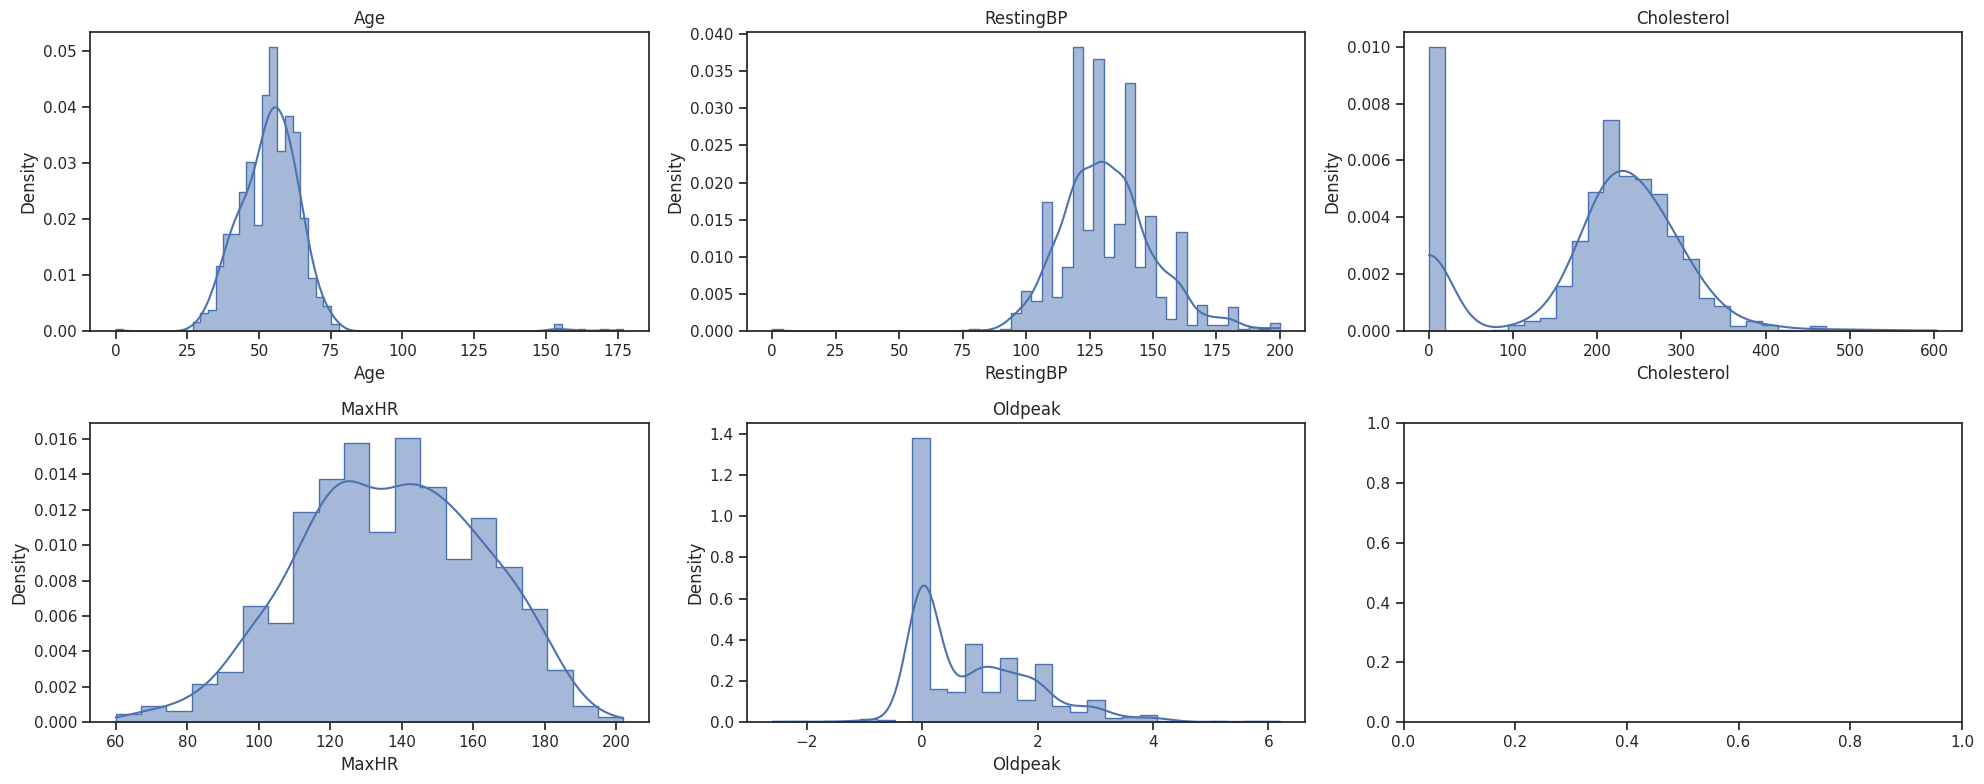

In [ ]:
# Membuat grid histogram dengan Seaborn
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

# Menggunakan Seaborn untuk membuat histogram dalam grid
for i in range(len(NumVar.columns)):
    row, col = divmod(i, 3)
    sns.histplot(NumVar.iloc[:, i], kde=True, ax=axes[row, col], element="step", stat="density", common_norm=False)
    axes[row, col].set_title(NumVar.columns[i])

# Mengatur layout
plt.tight_layout()
plt.show()

* **Kesimpulan** pada variabel Age ,RestingBP dan Cholesterol terlihat memiliki outlier, sedangkan MaxHR tidak memiliki outlier dan berdistribusi normal.

**Penanganan outlier**

Dikarenakan pada variabel Age, RestingBP dan Cholesterol terdapat outlier tahap selanjutnya adalah menangani outlier

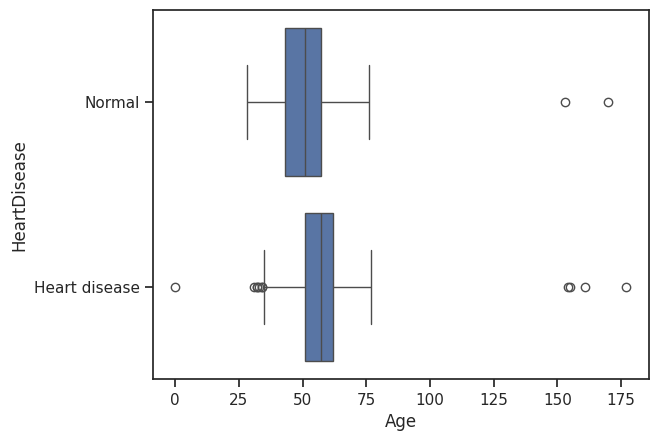

In [ ]:
# Visual Python: Visualization > Seaborn
p = sns.boxplot(x="Age", y="HeartDisease", data=data)
plt.show()

Q1=47.0, Q3=60.0, IQR=13.0


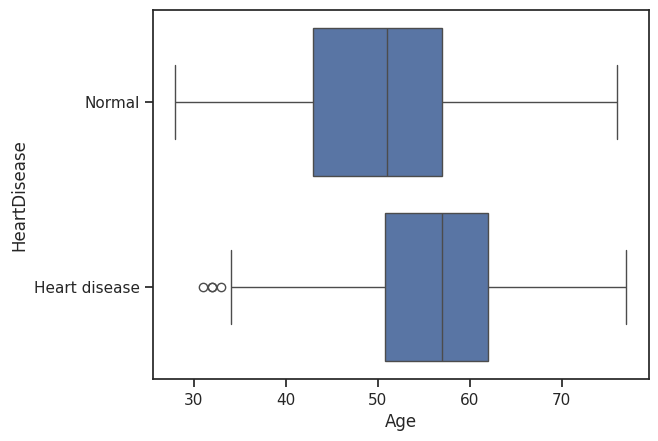

((895, 12), (902, 12))

In [ ]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

dataNoOutliers = data.drop(data[(data.Age < Q1-1.5*IQR) | (data.Age > Q3+1.5*IQR)].index)
p = sns.boxplot(x="Age", y="HeartDisease", data=dataNoOutliers)
plt.show()
dataNoOutliers.shape, data.shape

**Kesimpulan** Terdapat outlier namun dalam kasus ini tidak akan di exclude karena outliernya masih berdekatan. Apabila di exclude ternyata masih ada outlier.

**Transformasi**

In [ ]:
# Transformasi
print(data.shape)
for col in catVar.columns:
    if col != 'HeartDisease':
        transformasi = pd.get_dummies(data[col], prefix='')
        data = pd.concat([data, transformasi], axis = 1)
        # Hapus Variabel Kategorik Awal, Sudah tidak diperlukan
        try:
            data.drop([col], axis=1, inplace=True)
        except Exception as err_:
            print(err_)
print(data.shape)
data.head()

(902, 12)
(902, 22)


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,_F,_M,_ASY,_ATA,...,_0,_1,_LVH,_Normal,_ST,_N,_Y,_Down,_Flat,_Up
1,49.0,160,180,156,1.0,Heart disease,True,False,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37.0,130,283,98,0.0,Normal,False,True,False,True,...,True,False,False,False,True,True,False,False,False,True
3,48.0,138,214,108,1.5,Heart disease,True,False,True,False,...,True,False,False,True,False,False,True,False,True,False
4,54.0,150,195,122,0.0,Normal,False,True,False,False,...,True,False,False,True,False,True,False,False,False,True
5,39.0,120,339,170,0.0,Normal,False,True,False,False,...,True,False,False,True,False,True,False,False,False,True


Transformasi dilakukan one hot encoding untuk mengubah data kategori menjadi numerik.

# **Model**

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt
import time, numpy as np, seaborn as sns
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

'Done'

In [ ]:
N, P = data.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
data.head()

baris =  902 , Kolom (jumlah variabel) =  22


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,_F,_M,_ASY,_ATA,...,_0,_1,_LVH,_Normal,_ST,_N,_Y,_Down,_Flat,_Up
1,49.0,160,180,156,1.0,Heart disease,True,False,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37.0,130,283,98,0.0,Normal,False,True,False,True,...,True,False,False,False,True,True,False,False,False,True
3,48.0,138,214,108,1.5,Heart disease,True,False,True,False,...,True,False,False,True,False,False,True,False,True,False
4,54.0,150,195,122,0.0,Normal,False,True,False,False,...,True,False,False,True,False,True,False,False,False,True
5,39.0,120,339,170,0.0,Normal,False,True,False,False,...,True,False,False,True,False,True,False,False,False,True


### **Decision Tree**

In [ ]:
predictor = data.loc[:, ~data.columns.isin(['HeartDisease'])]
target = data['HeartDisease']

xTrain, xTest, yTrain, yTest = train_test_split(predictor, target, test_size=0.7, random_state=33)
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(270, 21) (270,)
(632, 21) (632,)


In [ ]:
# Decision Tree: http://scikit-learn.org/stable/modules/tree.html
DT = tree.DecisionTreeClassifier()
# Sengaja menggunakan default parameter, (Hyper)parameter Optimization akan dibahas kemudian
DT = DT.fit(xTrain, yTrain)
prediksi_DT = DT.predict(xTest)

print(confusion_matrix(yTest, prediksi_DT))
print(classification_report(yTest, prediksi_DT))

[[294  64]
 [ 54 220]]
               precision    recall  f1-score   support

Heart disease       0.84      0.82      0.83       358
       Normal       0.77      0.80      0.79       274

     accuracy                           0.81       632
    macro avg       0.81      0.81      0.81       632
 weighted avg       0.81      0.81      0.81       632



In [ ]:
mulai = time.time()
scores_dt = cross_val_score(DT, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt.mean(), scores_dt.std() * 2, waktu))

Accuracy Decision Tree: 0.78 (+/- 0.12), Waktu = 0.111 detik


**Kesimpulan**
*   True Positif 225
*   True Negatif 282
*   False Positif 49 - diperediksi tidak jantungan, namun memiliki penyakit jantung
*   False Negatif 76 - diprediksi jantungan, namun tidak memiliki penyakit jantung
*   Akurasi 79% dengan kemungkinan modelnya berubah sebesar +- 11%



In [ ]:
# Varible importance - Salah satu kelebihan Decision Tree
DT.feature_importances_

array([0.04212766, 0.10467475, 0.10317842, 0.08927398, 0.08579899,
       0.01687634, 0.        , 0.02094073, 0.01132726, 0.04733484,
       0.        , 0.01189362, 0.        , 0.01592895, 0.        ,
       0.        , 0.01651891, 0.03221188, 0.        , 0.00360068,
       0.39831298])

In [ ]:
# Variabel importances
fitur_penting = pd.DataFrame({'Feature_Name' : DT.feature_names_in_, 'Feature_Importance' : DT.feature_importances_})
fitur_penting.sort_values(by = 'Feature_Importance', ascending = False).head(10)

,Feature_Name,Feature_Importance
20,_Up,0.398313
1,RestingBP,0.104675
2,Cholesterol,0.103178
3,MaxHR,0.089274
4,Oldpeak,0.085799
9,_NAP,0.047335
0,Age,0.042128
17,_Y,0.032212
7,_ASY,0.020941
5,_F,0.016876


Tabel diatas merupakan variabel penting dari model Decision Tree

,0
DecTree,0.688889


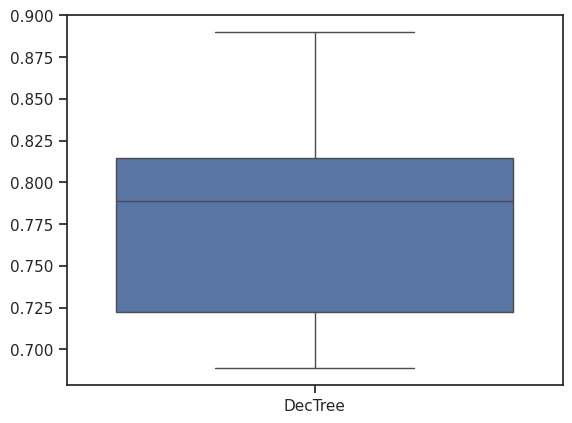

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
data_ = pd.DataFrame({"DecTree":scores_dt})
p = sns.boxplot(data = data_)
data_.min()

### **Regresi Logistik**

In [ ]:
reglog = LogisticRegression().fit(xTrain, yTrain)
prediksi_regLog = reglog.predict(xTest)
print(confusion_matrix(yTest, prediksi_regLog))
print(classification_report(yTest, prediksi_regLog))

[[310  48]
 [ 40 234]]
               precision    recall  f1-score   support

Heart disease       0.89      0.87      0.88       358
       Normal       0.83      0.85      0.84       274

     accuracy                           0.86       632
    macro avg       0.86      0.86      0.86       632
 weighted avg       0.86      0.86      0.86       632



In [ ]:
mulai = time.time()
scores_regLog = cross_val_score(reglog, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.85 (+/- 0.12), Waktu = 0.460 detik


,0
RegLog,0.733333
DecTree,0.688889


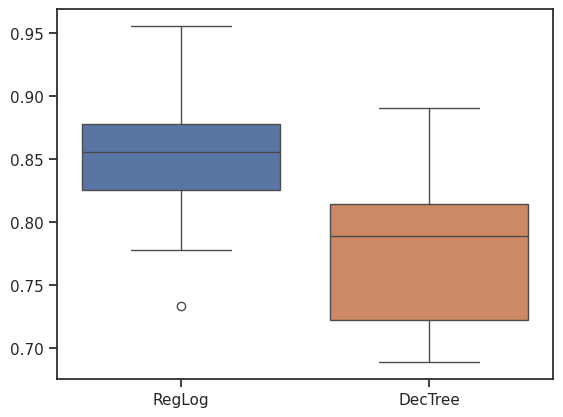

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
data_ = pd.DataFrame({'RegLog': scores_regLog, "DecTree":scores_dt})
p = sns.boxplot(data = data_)
data_.min()

**Kesimpulan**
*   True Positif 234
*   True Negatif 310
*   False Positif 40 - diperediksi tidak jantungan, namun memiliki penyakit jantung
*   False Negatif 48 - diprediksi jantungan, namun tidak memiliki penyakit jantung
*   Akurasi 85% dengan kemungkinan modelnya berubah sebesar +- 12%

### **Optimasi Parameter**

In [ ]:
# Atau secara programmatic
from sklearn.pipeline import make_pipeline
from sklearn import linear_model #import LogisticRegression

pipeSVM = make_pipeline(linear_model.LogisticRegression())
print(sorted(pipeSVM.get_params().keys()))

['logisticregression', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start', 'memory', 'steps', 'transform_input', 'verbose']


In [ ]:
# Hyperparameter optimization pada model Regresi Logistik menggunakan gridCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]},
             {'class_weight':[None, 'balanced']}]

grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_search.fit(xTrain, yTrain)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
0.8629629629629629
{'C': 0.1}


In [ ]:
# Contoh Hyperparameter optimization pada model SVM menggunakan RandomizedSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# Berikut ini contoh bagaimana mengetahui parameter yang dapat kita optimasi.
# Gunakan pengetahuan teori/analitik untuk mengoptimasi hanya parameter yang paling penting.
pipeDT = make_pipeline(tree.DecisionTreeClassifier())
print(sorted(pipeDT.get_params().keys()))

['decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__monotonic_cst', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter', 'memory', 'steps', 'transform_input', 'verbose']


In [ ]:
# Optimal parameter Desion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtree_model=DecisionTreeClassifier()
dtree_gscv = RandomizedSearchCV(dtree_model, param_grid, cv=10)
dtree_gscv.fit(xTrain, yTrain)

print(dtree_gscv.best_score_)
print(dtree_gscv.best_params_)

0.7888888888888889
{'max_depth': 4, 'criterion': 'gini'}


Accuracy RL: 0.83 (+/- 0.06)
Accuracy DT: 0.76 (+/- 0.07)


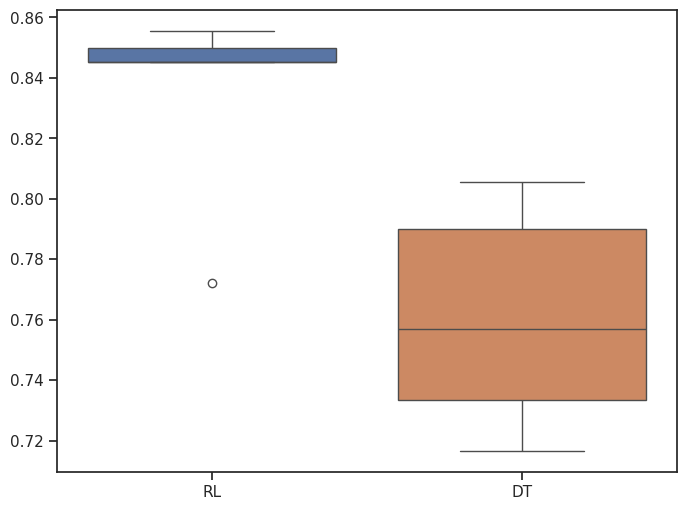

In [ ]:
kCV = 5 # Aslinya usahakan 10, idealnya 30 ... mengapa?
# Menggunakan parameter optimal
RL_opt = LogisticRegression(C = 0.1)
DT_opt = tree.DecisionTreeClassifier(criterion='gini', max_depth=13, random_state=0)

# Melakukan Cross Validasi
models = ['RL', 'DT']
RL_score = cross_val_score(RL_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
DT_score = cross_val_score(DT_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
scores = [RL_score, DT_score]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
p = sns.boxplot(data=pd.DataFrame(data), ax=ax)

dari gambar diatas dapat dilihat bahwa model yang lebih baik merupakan model Regrisi Logistik